In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from stop_words import get_stop_words
import nltk
nltk.download('punkt')

from spellchecker import SpellChecker

[nltk_data] Downloading package punkt to /home/baptiste/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [98]:
# Chemin vers le fichier des messages
file_path = '/home/baptiste/Desktop/Emploi/Formation/WildCodeSchool/Redline_Project/Project7/SMS.txt'

# Lire le fichier et créer un dataframe
with open(file_path, 'r', encoding='utf-8') as file:
    # Effectuer le split une fois à la rencontre du premier espace
    data = [line.strip().split('\t', 1) for line in file]

df = pd.DataFrame(data, columns=['label', 'message'])

# print(df.head())

In [99]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [15]:
df_ham = df.copy()
df_ham = df_ham.loc[df_ham['label'] == 'ham']

# label = spam
df_spam = df.copy()
df_spam = df_spam.loc[df_spam['label'] == 'spam']

In [16]:
df_spam['token'] = df_spam['message'].apply(nltk.word_tokenize)
df_ham['token'] = df_ham['message'].apply(nltk.word_tokenize)

## With stop words (initial sentences)

### Numbers of tokens

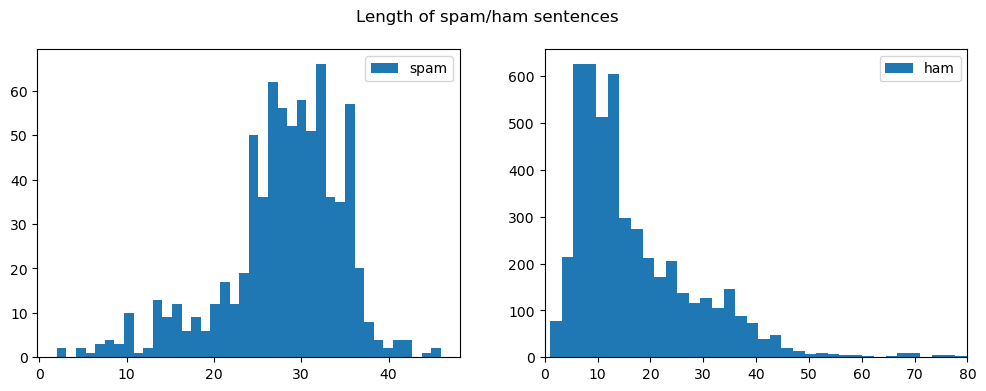

In [17]:
def length_sentences(df1, df2, num_col) :

    count_ham = []
    count_spam = []

    for i in range(len(df1)):
        count_ham.append(len(df1.iloc[i, num_col]))

    for i in range(len(df2)):
        count_spam.append(len(df2.iloc[i, num_col]))


    fig, axs = plt.subplots(1, 2, figsize = (12, 4))
    axs[0].hist(count_spam, bins = 40, label = 'spam')
    axs[1].hist(count_ham, bins = 100, label = 'ham')
    axs[1].set_xlim(0, 80)
    axs[0].legend()
    axs[1].legend()
    fig.suptitle('Length of spam/ham sentences')
    plt.show()
    
length_sentences(df_ham, df_spam, 2)

Deux populations sont observées sur les bases de taille des messages (contenant les stop_words). L'indicateur de taille peut donc être utilisé pour alimenter le modèle.

### Number of misspells

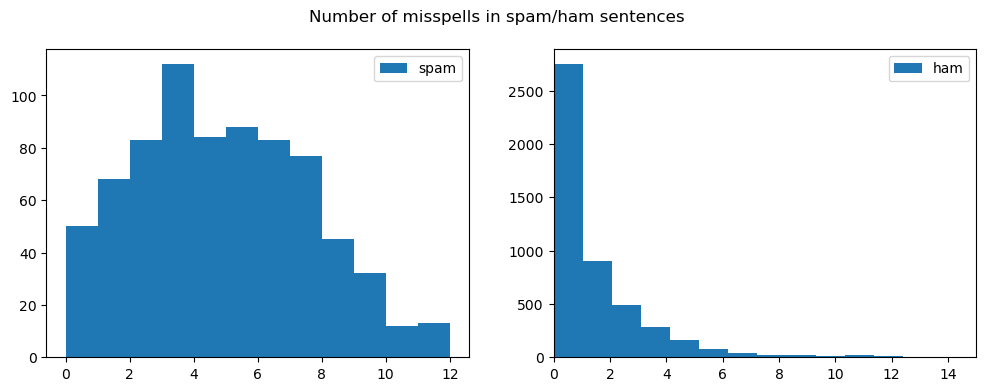

In [18]:
def number_misspells(df1, df2, num_col) :

    mspl_ham = []
    mspl_spam = []

    spell = SpellChecker()

    for i in range(len(df1)):
        misspelled = spell.unknown(df1.iloc[i, num_col])
        mspl_ham.append(len(misspelled))

    for i in range(len(df2)):
        misspelled = spell.unknown(df2.iloc[i, num_col])
        mspl_spam.append(len(misspelled))


    fig, axs = plt.subplots(1, 2, figsize = (12, 4))
    axs[0].hist(mspl_spam, bins = 12, label = 'spam')
    axs[0].legend()
    axs[1].hist(mspl_ham, bins = 30, label = 'ham')
    axs[1].set_xlim(0, 15)
    axs[1].legend()
    fig.suptitle('Number of misspells in spam/ham sentences')
    plt.show()
    
number_misspells(df_ham, df_spam, 2)

## Without stop_words

In [19]:
# define a list of stop_words from the english most common
# list  
stop_words = get_stop_words('english')

In [20]:
df_ham['token_filtred'] = df_ham['token'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df_spam['token_filtred'] = df_spam['token'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

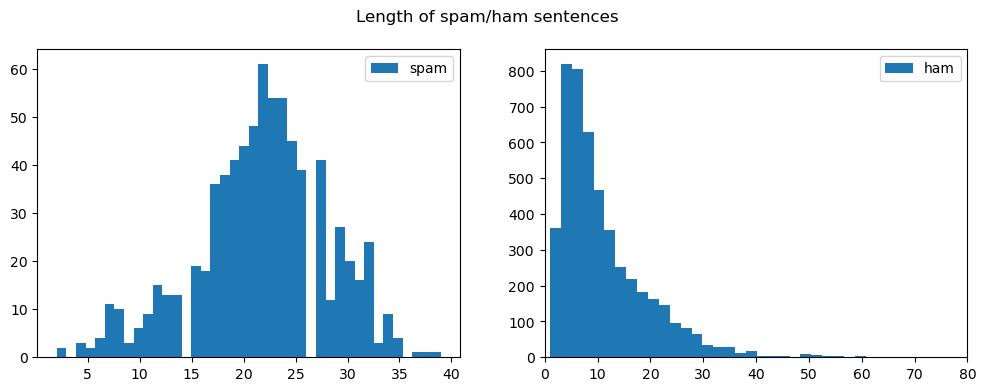

In [21]:
length_sentences(df_ham, df_spam, 3)

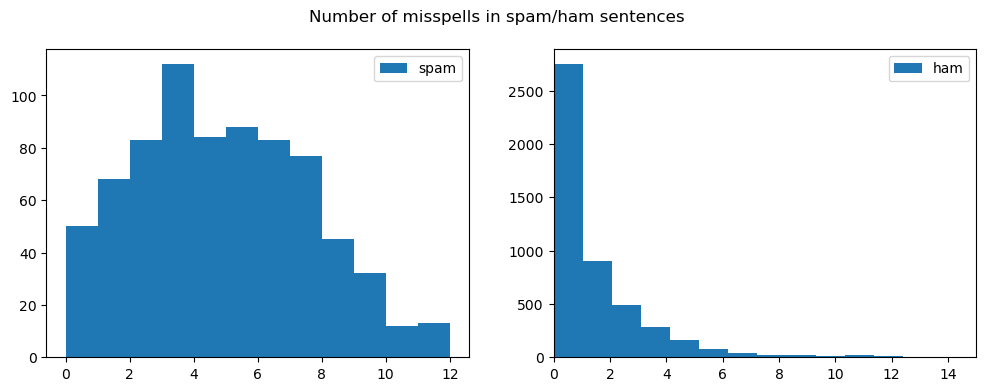

In [22]:
number_misspells(df_ham, df_spam, 3)

### Count Uppercase words

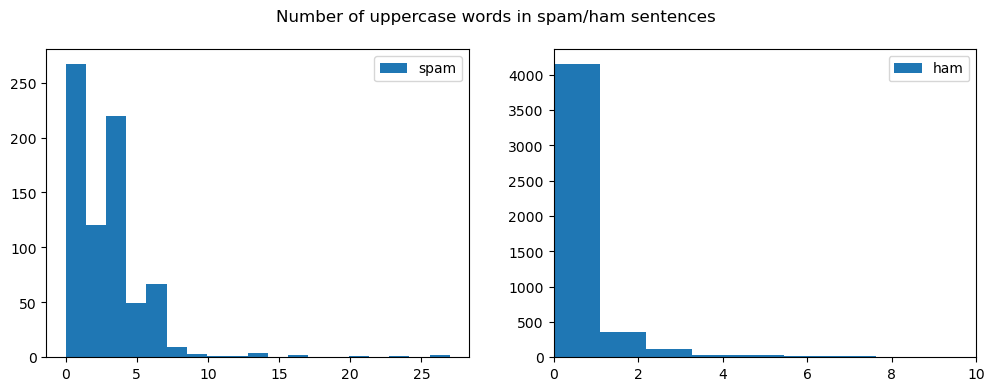

In [74]:
def number_uppercase(df1, df2, num_col) :

    upper_ham = []
    upper_spam = []

    for i in range(len(df1)):
        upper_ham.append(np.array([x.isupper() for x in df1.iloc[i, num_col]]).sum())

    for i in range(len(df2)):
        upper_spam.append(np.array([x.isupper() for x in df2.iloc[i, num_col]]).sum())

    fig, axs = plt.subplots(1, 2, figsize = (12, 4))
    axs[0].hist(upper_spam, bins = len(np.unique(upper_spam)), label = 'spam')
    axs[0].legend()
    axs[1].hist(upper_ham, bins = len(np.unique(upper_ham)), label = 'ham')
    axs[1].set_xlim(0, 10)
    axs[1].legend()
    fig.suptitle('Number of uppercase words in spam/ham sentences')
    plt.show()
    
number_uppercase(df_ham, df_spam, 2)

# Final Preprocessing

In [100]:
def nlp_preprocess(df):
    # Colonne de listes de token
    df['token'] = df['message'].apply(nltk.word_tokenize)
    
    # Colonne indiquant la taille de la phrase
    df['length'] = df.apply(lambda row: len(row['token']), axis=1)

    # Colonne indiquant le nombre de fautes d'orthographes 
    spell = SpellChecker()
    df['misspell'] = df.apply(lambda row: len(spell.unknown(row['token'])), axis=1)

    # Colonne indiquant le nombre de mots en majuscules
    df['upper'] = df.apply(lambda row: np.array([x.isupper() for x in row['token']]).sum(), axis = 1) 
    
    return df

In [101]:
df2 = nlp_preprocess(df)

In [102]:
df2

,label,message,token,length,misspell,upper
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...",24,5,0
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,1,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,9,4
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,2,2
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,2,1
...,...,...,...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...",35,6,2
5570,ham,Will ü b going to esplanade fr home?,"[Will, ü, b, going, to, esplanade, fr, home, ?]",9,3,0
5571,ham,"Pity, * was in mood for that. So...any other s...","[Pity, ,, *, was, in, mood, for, that, ., So, ...",15,1,0
5572,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,...",27,1,1
